# Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder


In [2]:
df=pd.read_csv("Sales_forecasting.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Preprocessing

## Data Cleaning

#### EDA

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


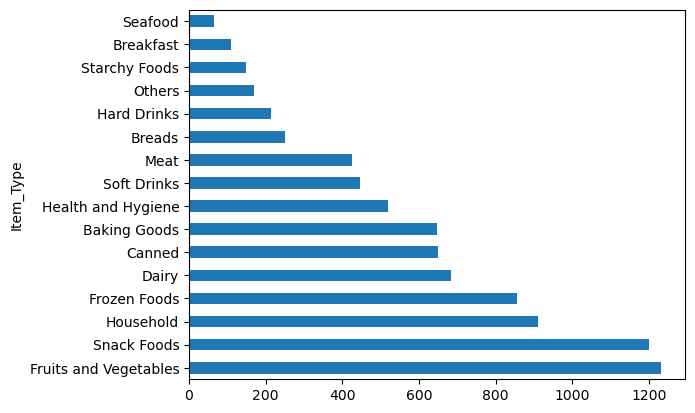

In [6]:
df['Item_Type'].value_counts().plot(kind='barh')
plt.show()

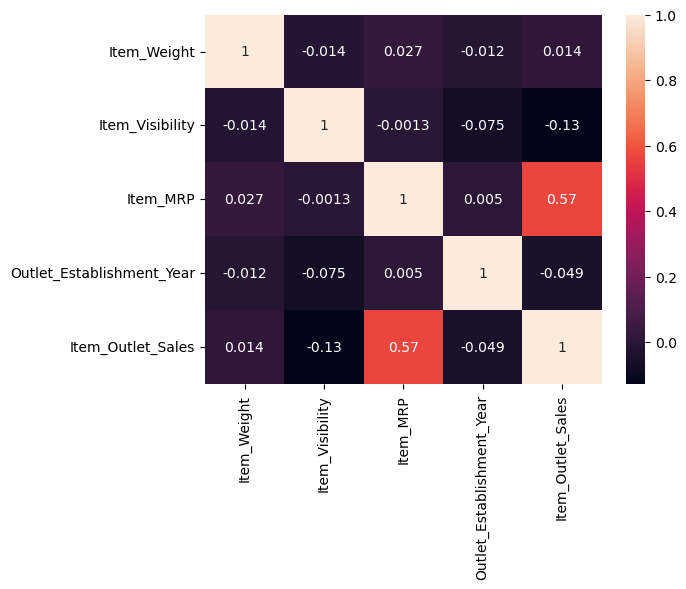

In [7]:
num_columns = df.select_dtypes(include=['float64','int64'])
sns.heatmap(num_columns.corr(),annot=True)
plt.show()

#### Filling missing values

In [8]:
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


Display the rows with missing 'Outlet_Size'

In [9]:
missing_outlet_size = df[df['Outlet_Size'].isnull()]
missing_outlet_size

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


Iterate over the missing values and impute based on 'Outlet_Type'

In [10]:
for index, row in missing_outlet_size.iterrows():
    similar_rows = df[(df['Outlet_Type'] == row['Outlet_Type']) & (~df['Outlet_Size'].isnull())]
    
    # If there are similar rows with non-null 'Outlet_Size', take the mode
    if not similar_rows.empty:
        mode_value = similar_rows['Outlet_Size'].mode()[0]
        df.at[index, 'Outlet_Size'] = mode_value
    else:
        # If no similar rows are found,setting it to the mode of the entire 'Outlet_Size' column
        df.at[index, 'Outlet_Size'] = df['Outlet_Size'].mode()[0]


Check if there are still missing values

In [11]:
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


Display the rows with missing 'Item Weight'

In [12]:
missing_item_weight = df[df['Item_Weight'].isnull()]
missing_item_weight

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [13]:
for index, row in missing_item_weight.iterrows():
    similar_rows = df[(df['Item_Type'] == row['Item_Type']) & (~df['Item_Weight'].isnull())]
    
    # Impute missing 'Item_Weight' with the mean of similar rows, if any
    if not similar_rows.empty:
        df.at[index, 'Item_Weight'] = similar_rows['Item_Weight'].mean()
    else:
        # If no similar rows are found,impute with the mean of the entire 'Item_Weight' column
        df.at[index, 'Item_Weight'] = df['Item_Weight'].mean()

In [14]:
print(df.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


#### Finding duplicates

In [15]:
df.duplicated().any()

False

#### Skewness of data

In [16]:
num_columns = df.select_dtypes(include=['float64', 'int64'])
skewness = num_columns.apply(lambda x: x.skew())
threshold = 3
for column, skew_value in skewness.items():
    skew_label = "Skewed" if abs(skew_value) > threshold else "Normal"
    print(f"{column}: {skew_label} (Skewness = {skew_value:.2f})")


Item_Weight: Normal (Skewness = 0.09)
Item_Visibility: Normal (Skewness = 1.17)
Item_MRP: Normal (Skewness = 0.13)
Outlet_Establishment_Year: Normal (Skewness = -0.40)
Item_Outlet_Sales: Normal (Skewness = 1.18)


#### Checking distribution

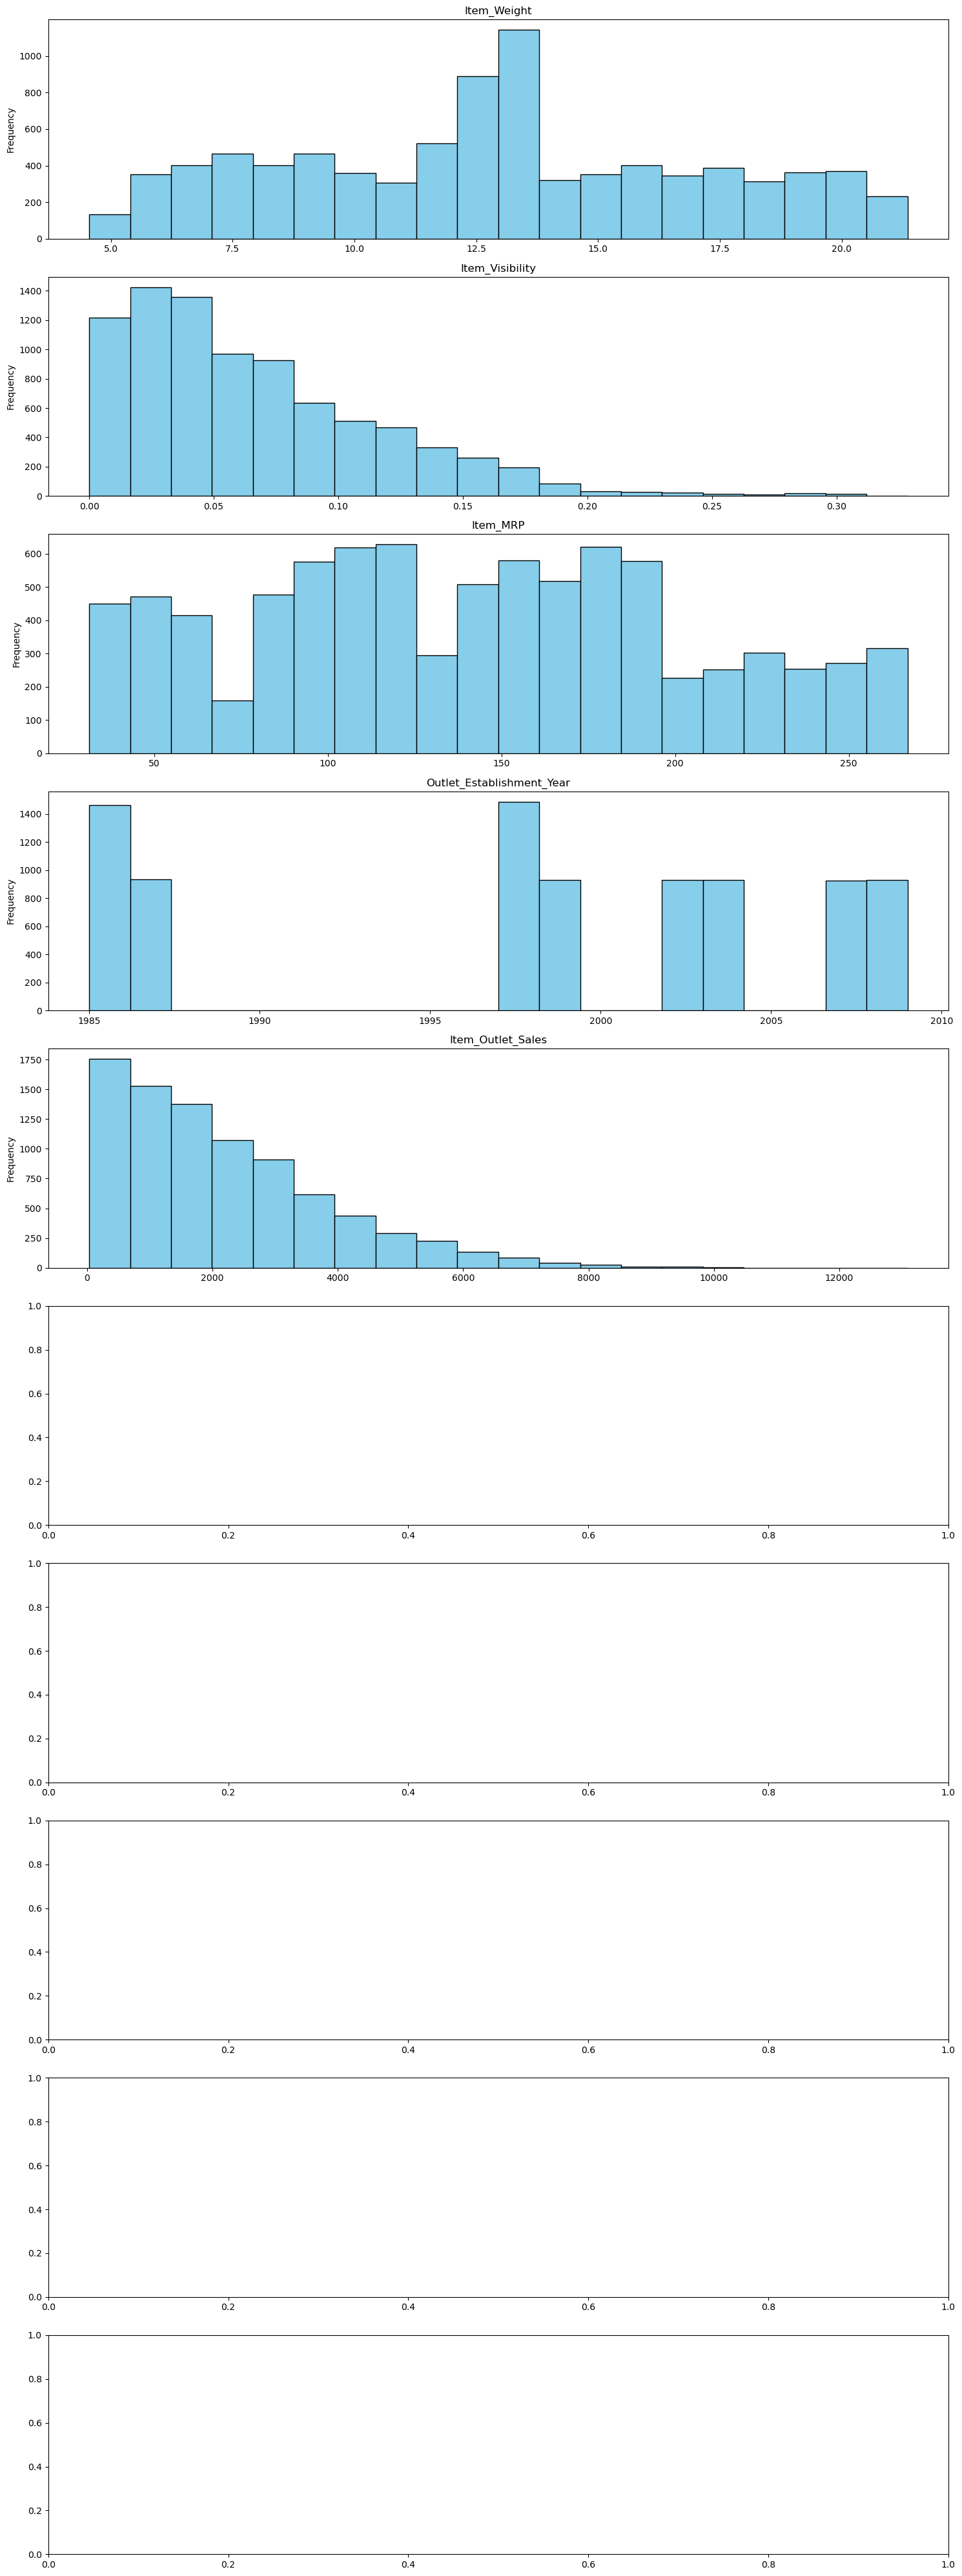

In [17]:
#fig, axes = plt.subplots(nrows=len(num_columns), ncols=1, figsize=(8, 2 * len(num_columns)))
fig, axes = plt.subplots(nrows=min(10, len(num_columns)), ncols=1, figsize=(15, 4 * min(10, len(num_columns))))


# Plot histograms for each numerical column
for i, column in enumerate(num_columns):
    ax = axes[i]
    ax.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Handling inconsistent data

In [18]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [19]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [20]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [21]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Checking Homogeneity

In [23]:
def chi_sq_test(var1, var2):
    cont_table = pd.crosstab(var1, var2)
    _,p,_,_ = chi2_contingency(cont_table)
    if p < 0.05:
        print('Accept the Alternate Hypothesis (There is a realation between var1 and var2)', round(p, 2))
    else:
        print('Failed to Reject Null Hypothesis (There is no relation between var1 and var2)', round(p, 2))
    return cont_table

In [24]:
chi_sq_test(df['Outlet_Size'], df['Outlet_Location_Type'])

Accept the Alternate Hypothesis (There is a realation between var1 and var2) 0.0


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,2785,555


In [25]:
chi_sq_test(df['Item_Fat_Content'], df['Item_Type'])

Accept the Alternate Hypothesis (There is a realation between var1 and var2) 0.0


Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,,,,
Low Fat,329,140,41,341,418,450,630,214,520,910,170,169,37,692,374,82
Regular,319,111,69,308,264,406,602,0,0,0,255,0,27,508,71,66


In [26]:
chi_sq_test(df['Outlet_Location_Type'], df['Outlet_Type'])

Accept the Alternate Hypothesis (There is a realation between var1 and var2) 0.0


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,528,1860,0,0
Tier 2,0,2785,0,0
Tier 3,555,932,928,935


#### Feature Selection

We don't need IDs and year so we will remove it

In [27]:
df.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], inplace = True, axis = 1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


In [29]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Small,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976


#### Handling Categorical values 

In [31]:
columns_to_encode = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
columns_to_encode_existing = [col for col in columns_to_encode if col in df.columns]
df = pd.get_dummies(df, columns=columns_to_encode_existing)
df[columns_to_encode_existing] = df[columns_to_encode_existing].astype(int)


In [32]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,True,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,443.4228,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,2097.2700,True,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,732.3800,False,True,False,False,False,False,...,False,False,True,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,994.7052,True,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Item_Outlet_Sales                8523 non-null   float64
 4   Item_Fat_Content_Low Fat         8523 non-null   bool   
 5   Item_Fat_Content_Regular         8523 non-null   bool   
 6   Item_Type_Baking Goods           8523 non-null   bool   
 7   Item_Type_Breads                 8523 non-null   bool   
 8   Item_Type_Breakfast              8523 non-null   bool   
 9   Item_Type_Canned                 8523 non-null   bool   
 10  Item_Type_Dairy                  8523 non-null   bool   
 11  Item_Type_Frozen Foods           8523 non-null   bool   
 12  Item_Type_Fruits and

In [34]:
# Iterate through columns
for col in df.columns:
    # Check if the column contains boolean values
    if df[col].dtype == bool:
        # Check if the column is not a float column
        if col not in df.select_dtypes(include=['float']).columns:
            # Convert boolean values to 0 and 1
            df[col] = df[col].astype(int)

# Check the resulting DataFrame
print(df)


      Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0           9.300         0.016047  249.8092          3735.1380   
1           5.920         0.019278   48.2692           443.4228   
2          17.500         0.016760  141.6180          2097.2700   
3          19.200         0.000000  182.0950           732.3800   
4           8.930         0.000000   53.8614           994.7052   
...           ...              ...       ...                ...   
8518        6.865         0.056783  214.5218          2778.3834   
8519        8.380         0.046982  108.1570           549.2850   
8520       10.600         0.035186   85.1224          1193.1136   
8521        7.210         0.145221  103.1332          1845.5976   
8522       14.800         0.044878   75.4670           765.6700   

      Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                            1                         0   
1                            0                         1   
2              

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Item_Outlet_Sales                8523 non-null   float64
 4   Item_Fat_Content_Low Fat         8523 non-null   int32  
 5   Item_Fat_Content_Regular         8523 non-null   int32  
 6   Item_Type_Baking Goods           8523 non-null   int32  
 7   Item_Type_Breads                 8523 non-null   int32  
 8   Item_Type_Breakfast              8523 non-null   int32  
 9   Item_Type_Canned                 8523 non-null   int32  
 10  Item_Type_Dairy                  8523 non-null   int32  
 11  Item_Type_Frozen Foods           8523 non-null   int32  
 12  Item_Type_Fruits and

In [36]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [37]:
x=df.drop(columns=['Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

In [38]:
x

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,0,1,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [39]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=100)

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [278]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

def objective(trial):
    # Define the hyperparameters to be optimized
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)
    num_hidden_layers = trial.suggest_int('num_hidden_layers', 1, 5)
    
    # Build the model
    model = Sequential()
    model.add(Dense(trial.suggest_int('num_units_input', 32, 256), input_dim=xtrain.shape[1], activation='relu'))

    # Add hidden layers
    hidden_units = [trial.suggest_int(f'num_units_layer_{i}', 32, 256) for i in range(num_hidden_layers)]

    for i in range(num_hidden_layers):
        activation = trial.suggest_categorical(f'activation_layer_{i}', ['relu'])
        model.add(Dense(hidden_units[i], activation=activation))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='linear'))  # Assuming regression task

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='mean_squared_error')

    # Train the model
    model.fit(xtrain, ytrain, epochs=50, batch_size=128, verbose=0)

    # Evaluate on the test set
    score = model.evaluate(xtest, ytest, verbose=0)
    
    return score

# Create the Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')  # Minimize mean squared error
study.optimize(objective, n_trials=20)

# Get the best parameters
best_params = study.best_params
print(f"Best Parameters: {best_params}")

# Retrieve the best trial
best_trial = study.best_trial
print(f"Best Trial - Loss: {best_trial.value}, Params: {best_trial.params}")


[I 2023-12-31 18:31:11,518] A new study created in memory with name: no-name-7c125fcd-eaff-432a-bf14-0631182dffb2
C:\Users\samee\AppData\Local\Temp\ipykernel_19140\1760450067.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
C:\Users\samee\AppData\Local\Temp\ipykernel_19140\1760450067.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)
[I 2023-12-31 18:31:25,467] Trial 0 finished with value: 1267996.875 and parameters: {'learning_rate': 0.0020480767779836504, 'dropout_rate': 0.09460655407430513, 'num_hidden_layers': 3, 'num_units_input': 252, 'num_units_l

Best Parameters: {'learning_rate': 0.0002363847848055346, 'dropout_rate': 0.22611929503169342, 'num_hidden_layers': 3, 'num_units_input': 233, 'num_units_layer_0': 72, 'num_units_layer_1': 99, 'num_units_layer_2': 187, 'activation_layer_0': 'relu', 'activation_layer_1': 'relu', 'activation_layer_2': 'relu'}
Best Trial - Loss: 1237437.875, Params: {'learning_rate': 0.0002363847848055346, 'dropout_rate': 0.22611929503169342, 'num_hidden_layers': 3, 'num_units_input': 233, 'num_units_layer_0': 72, 'num_units_layer_1': 99, 'num_units_layer_2': 187, 'activation_layer_0': 'relu', 'activation_layer_1': 'relu', 'activation_layer_2': 'relu'}


In [279]:
# Use the best parameters obtained from the optimization
best_learning_rate = 0.0002363847848055346
best_dropout_rate = 0.22611929503169342
best_num_hidden_layers = 3
best_num_units_input = 233
best_num_units_layer = [72, 99, 187]
best_activation_functions = ['relu', 'relu', 'relu']

# Build the final model
final_model = Sequential()
final_model.add(Dense(best_num_units_input, input_dim=xtrain.shape[1], activation='relu'))

for i in range(best_num_hidden_layers):
    final_model.add(Dense(best_num_units_layer[i], activation=best_activation_functions[i]))
    final_model.add(Dropout(best_dropout_rate))

final_model.add(Dense(1, activation='linear'))  # Assuming regression task

# Compile the final model
final_model.compile(optimizer=Adam(learning_rate=best_learning_rate),
                   loss='mean_squared_error')


In [280]:
final_model.fit(xtrain, ytrain, epochs=50, batch_size=128, verbose=1)


Epoch 1/50
54/54 [==============================] - 1s 4ms/step - loss: 7611911.5000
Epoch 2/50
54/54 [==============================] - 0s 4ms/step - loss: 7400307.0000
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 5434074.0000
Epoch 4/50
54/54 [==============================] - 0s 4ms/step - loss: 2223344.7500
Epoch 5/50
54/54 [==============================] - 0s 4ms/step - loss: 1758006.2500
Epoch 6/50
54/54 [==============================] - 0s 4ms/step - loss: 1617190.2500
Epoch 7/50
54/54 [==============================] - 0s 4ms/step - loss: 1506620.7500
Epoch 8/50
54/54 [==============================] - 0s 4ms/step - loss: 1436251.3750
Epoch 9/50
54/54 [==============================] - 0s 4ms/step - loss: 1369925.7500
Epoch 10/50
54/54 [==============================] - 0s 4ms/step - loss: 1340280.8750
Epoch 11/50
54/54 [==============================] - 0s 4ms/step - loss: 1310731.0000
Epoch 12/50
54/54 [==============================] - 0s 5ms/ste

In [281]:
final_score = final_model.evaluate(xtest, ytest, verbose=1)
print(f"Final Model Test Loss: {final_score}")


54/54 [==============================] - 0s 2ms/step - loss: 1237262.8750
Final Model Test Loss: 1237262.875


In [282]:
y_pred = final_model.predict(xtest)


54/54 [==============================] - 0s 1ms/step


In [283]:
# Calculate R-squared (R2) score
from sklearn.metrics import r2_score

r2 = r2_score(ytest, y_pred)
print(f"R-squared (R2) Score: {r2}")


R-squared (R2) Score: 0.580634520009726
